# Iris data classification 

### Lifecycle of basic ML project

* understanding problem statement
* Data Collection
* Data Checks to perform
* Handling categorical variables
* Model Training
* Prediction

## 1 Problem Statement:
 This is a simple problem Statement to predict the species type while loading with independent variables 

## 2 Data Collection

### 2.1 Importing required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

### 2.2 Converting data into dataframe


In [4]:
df=pd.read_csv('Iris.csv')

## 3 Data Checks 
### 3.1 Checking for missing values

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This results that there are no null values

### 3.2 Checking for duplicates

In [6]:
df.duplicated().sum()

0

there are no duplicate values

## 3.3 Checking data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There is only one categorical variable and that is target value

### 3.4 Checking for unique vlaues

In [8]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

Here other than Species all are numerical variable so we didn't consider them, so species has three unique values and that are {"Iris-setosa","Iris-versicolor","Iris-virginica"}

### 3.5 Checking for stats of dataset


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Insights
Here all the variables has means from 1.2 tp 5.8


# 4 Handling categorical variables

In [15]:
from sklearn.preprocessing import LabelEncoder
lable_encoder=LabelEncoder()
df["Species"]=lable_encoder.fit_transform(df["Species"])
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


we had converted all ariables into numerical values

## 5 model training

### 5.1 Importing required packages for all models

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings


### 5.2 Preparing X and Y variables

In [17]:
X= df.drop(columns=['Species'],axis=1)
y=df["Species"]

In [18]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

#### seperating train and test data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


Create an Evaluate Function to give all metrics after model Training

In [21]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [25]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K Neighbors Classifier":KNeighborsClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier (),
    "Ada Boost Classifier":AdaBoostClassifier(),
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)  #training model
    
    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluating train and test dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set :")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    
    print("---------------------------")
    print("Model performance for Testing set :")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")
    
    

Linear Regression
Model performance for Training set :
- Root Mean Squared Error: 0.1748
- Mean Absolute Error: 0.1428
- R2 score: 0.9536
---------------------------
Model performance for Testing set :
- Root Mean Squared Error: 0.1369
- Mean Absolute Error: 0.1103
- R2 score: 0.9732


Lasso
Model performance for Training set :
- Root Mean Squared Error: 0.2830
- Mean Absolute Error: 0.2409
- R2 score: 0.8784
---------------------------
Model performance for Testing set :
- Root Mean Squared Error: 0.2337
- Mean Absolute Error: 0.1870
- R2 score: 0.9219


Ridge
Model performance for Training set :
- Root Mean Squared Error: 0.1751
- Mean Absolute Error: 0.1431
- R2 score: 0.9534
---------------------------
Model performance for Testing set :
- Root Mean Squared Error: 0.1366
- Mean Absolute Error: 0.1085
- R2 score: 0.9733


K Neighbors Classifier
Model performance for Training set :
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 score: 1.0000
--------------------

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_score']).sort_values(by=["R2_score"],ascending=True)

,Model Name,R2_score
1,Lasso,0.921869
0,Linear Regression,0.973192
2,Ridge,0.973293
3,K Neighbors Classifier,1.000000
4,Decision Tree Classifier,1.000000
5,Random Forest Classifier,1.000000
6,Ada Boost Classifier,1.000000


we are considering Linear Regressor as model

## Linear Regression

In [27]:
lin_model= LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred  = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 97.32


## Ploting y_pred and _test

Text(0, 0.5, 'Predicted')

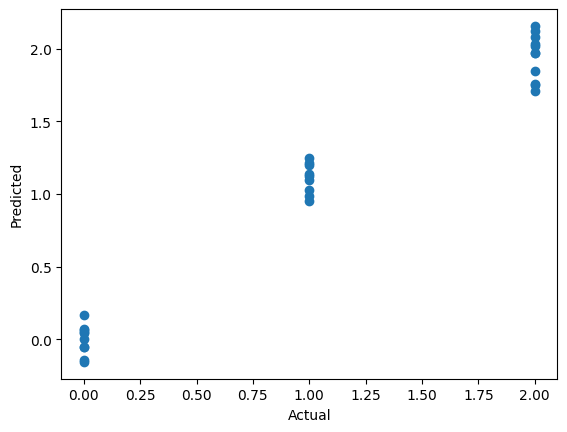

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Difference between actual and predicted values

In [30]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
73,1,1.137436,-0.137436
18,0,-0.057264,0.057264
118,2,2.120840,-0.120840
78,1,1.245462,-0.245462
76,1,1.214586,-0.214586
31,0,0.070629,-0.070629
64,1,0.954219,0.045781
141,2,2.020655,-0.020655
68,1,1.197133,-0.197133
82,1,1.096522,-0.096522
